# Checkup for one sample WAXS stitching

--> V2: Dev March 20, 2018 adding options in func: Correct_Overlap_Images_Intensities
       
       New Options: do_smooth, pixel_start_smooth, pixel_stop_smooth

### SMI OLOG

SMI Olog (https://logbook.nsls2.bnl.gov/12-ID/)

In [1]:
%matplotlib notebook
from pySMI.smi_libs import *
from pySMI.smi_package import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

%run ~/pySMI/pySMI/smi_generic_functions.py

beam_x = 98.0 #97.0 for 2.4 keV; 98 for 16 keV
beam_y = 1316.0   #1475 - 159
energy = 16.1 #keV

wavelength_A =12.39842/energy
sam_det = 0.275 #in meters
dq = 4*np.pi/wavelength_A  * (172/1e6/sam_det)

calibration = CalibrationGonio(wavelength_A= wavelength_A) # 20.0 keV
calibration.set_image_size(195, height=1475) # Pilatus300kW vertical
#calibration.set_image_size(1475, height=195) # Pilatus300kW horizontal
calibration.set_pixel_size(pixel_size_um=172.0)
calibration.set_beam_position(beam_x,  beam_y )
calibration.set_distance( sam_det )
calibration.set_angles(det_phi_g=0., det_theta_g=0., )
print('ratio Dw = {:.3f}'.format(calibration.get_ratioDw()))
mask_dir = '/GPFS/xf12id1/analysis/commissioning/masks/'
mask = Mask(mask_dir+'Pilatus300kWh_main_gaps-mask.png')
#mask.load('./Pilatus300kWh_current-mask.png')
mask.load(mask_dir+'Pilatus300kWh_current-mask.png')


ratio Dw = 8.199


# Define Cycle &proposal_id here

In [2]:
CYCLE='2018_2'
proposal_id =  '303134_Ocko'
username = 'Ben'

inDir = '/GPFS/xf12id1/data/300KW/images/users/%s/'%proposal_id

fp = get_base_all_filenames(inDir,base_filename_cut_length=-12-3 )
print('We found %s samples in %s folder.' %(len( list( fp.keys() ) ), inDir ) )

We found 96 samples in /GPFS/xf12id1/data/300KW/images/users/303134_Ocko/ folder.


# Create ResDir Here

In [3]:
ResDir0 = os.path.join('/GPFS/xf12id1/analysis/%s/'%CYCLE, proposal_id, 'Results/%s/'%username)
ResDir0 = os.path.join('/GPFS/xf12id1/analysis/Debug/Results/')
os.makedirs(ResDir0, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % ResDir0)

for k in list(fp.keys()):
    print(k)

Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/Debug/Results/
test_test_
self_membrane_inc_0.1_
self_membrane_inc_0.075_
polyCD0.5nottreatM0.1T0.04_inc_0.1_
polyCD0.5nottreatM0.1T0.04_inc_0.075_
polyCD0.2treatM0.1T0.04_inc_0.1_
polyCD0.2treatM0.1T0.04_inc_0.075_
polyCD0.2nottreatM0.1T0.04_inc_0.1_
polyCD0.2nottreatM0.1T0.04_inc_0.075_
empty_cap_outside_
empty_cap_outside1_
empty_cap_inner_
empty_cap_center_
cap3.5__
backempty__
T0.04M0.1_nohex_treat_inc_0.1_
T0.04M0.1_nohex_treat_inc_0.075_
T0.04M0.1_nohex_nottreat_inc_0.1_
T0.04M0.1_nohex_nottreat_inc_0.075_
T0.004M0.1_nohex_treat_inc_0.1_
T0.004M0.1_nohex_treat_inc_0.075_
T0.004M0.1_nohex_nottreat_inc_0.1_
T0.004M0.1_nohex_nottreat_inc_0.075_
Si-wafers_inc_0.1_
Si-wafers_inc_0.075_
SW30XLE_Kai_inc_0.1_
SW30XLE_Kai_inc_0.075_
SW30XLE_FU_inc_0.1_
SW30XLE_FU_inc_0.075_
SW30HR_FU_inc_0.1_
SW30HR_FU_inc_0.075_
Priyanka_CNF_pure_inc_0.1_
Priyanka_CNF_pure_inc_0.075_
Priyanka_0.2CNF_inPA_inc_0.1_
Priyanka

# Select a interested data set here

In [21]:
k = 'Priyanka_CNF_pure_inc_0.1_'

k = 'Bulk_TMC_MPD__'


k

ResDir = os.path.join( ResDir0, k +'/' )
os.makedirs(ResDir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % ResDir)

infiles = sorted( fp[k] )
print(len(infiles))
print(infiles)


Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/Debug/Results/Bulk_TMC_MPD__/
6
['/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000001_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000002_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000003_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000004_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000005_WAXS.tif', '/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000006_WAXS.tif']


# Check raw data

<IPython.core.display.Javascript object>


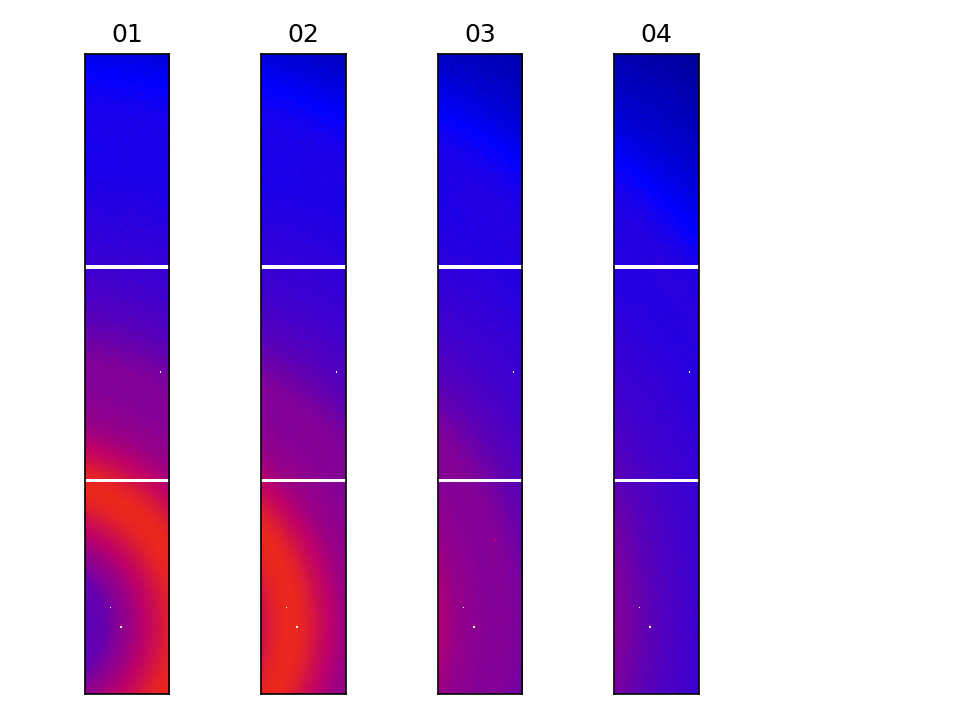

In [23]:
ResDir

Ns = 0
Ni = 4

vmin= 200
vmax= 2e5

fig = plt.figure()# figsize=[2,8]) 
for i in range(Ns, Ns+Ni):
    ax = fig.add_subplot(1, Ni+1, i+1)
    #d = process.load(  infiles[i]  )
    
    d = np.array(  PIL.Image.open(infiles[i]).convert('I') )
    #vmin=  max(1, d.mean() - d.std()*sca), vmax= d.mean() + d.std()*sca,
    sca= 1
    show_img( (d).T, logs = True, show_colorbar= False,show_ticks =False,
             ax= [fig, ax], image_name= '%02d'%(i+1), cmap = cmap_vge_hdr, 
             vmin= vmin, vmax= vmax,              
            aspect=1, save=False, path=ResDir)
    
fig.savefig(ResDir + k+'raw_image_%s-%s.png'%(Ns, Ns+Ni))

# Set data for stitching

In [24]:
Ns = 0  #Ns = 210 is a good for benchmark
Ni = 4

if Ns%2:
    snake = True
    print('This is a snake scan.')
else:
    snake = False
if snake:
    infiles = sorted( fp[k] )[ Ns: Ns+Ni][::-1]
else:
    infiles = sorted( fp[k] )[ Ns: Ns+Ni] 

print( sorted(fp[k])[Ns])
#phis = np.array( [get_phi(infile, phi_offset= 0, phi_start=4.5, phi_spacing= 4.0, ext='_WAXS.tif') for infile in infiles]     )
start_angle = 7.0
phi_spacing = 6.0 #

phis = -start_angle - np.arange(0, Ni) * phi_spacing 
print('The rotated angles are: %s.'%phis)

overlap_width = get_pixel_overlap( phi_spacing )
print( overlap_width )


/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000001_WAXS.tif
The rotated angles are: [ -7. -13. -19. -25.].
28


# Find the scaling factor for stitiching
* define the smoothing parameter (w, p)  in a savgol_filter algorithm

In [25]:
w= 901

if w>=101:
    p = 5

else:
    p=3
    
print(w,p)    

infiles
    

901 5


['/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000001_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000002_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000003_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/303134_Ocko/Bulk_TMC_MPD__000004_WAXS.tif']

# Stich by giving filenames

<IPython.core.display.Javascript object>


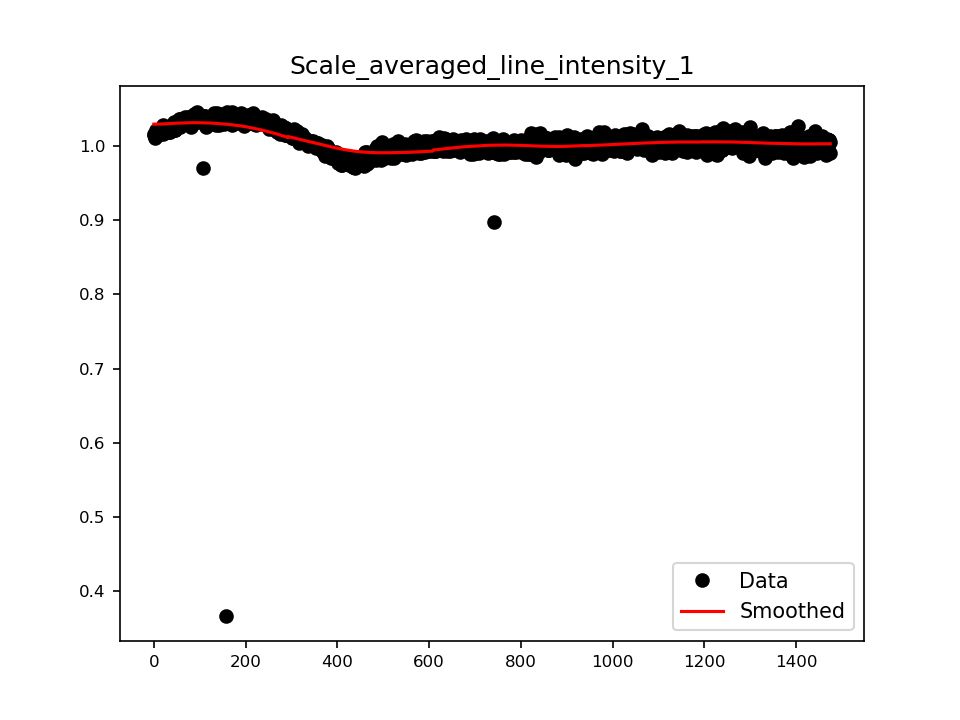

In [26]:
#Correct_Overlap_Images_Intensities?#
%run ~/pySMI/pySMI/Stitching.py
do_smooth= True

data, dataM, scale,scale_smooth = Correct_Overlap_Images_Intensities( infiles, window_length=w, polyorder=p, 
                            overlap_width= overlap_width, badpixel_width = 10, do_smooth= do_smooth,
                       pixel_start_smooth = 0,pixel_stop_smooth =None  )
 
check_overlap_scaling_factor( scale,scale_smooth, i=1, 
                             filename = ResDir + k + 'smoothed_one_line_1_%s-%s.png'%(Ns, Ns+Ni), 
                             save= True )


# Stitching data here

In [27]:
angzs, angze, angxs, angxe = [
    np.degrees( np.arctan2 ( (beam_y-data.shape[0]) * 172/1e6, sam_det ) ), 
    np.degrees( np.arctan2 ( ( beam_y ) * 172/1e6, sam_det ) ),
    abs(phis[0]) - 3.5, 
    abs(phis[ len(phis)-1]) + 3.5     ] 

ytick = np.round( np.linspace(angzs, angze, 9 ), 0 )
xtick = np.round( np.linspace(angxs, angxe, 8 ), 0 )
axs =  np.linspace(angxs, angxe, data.shape[1] )
azs =  np.linspace(angzs, angze, data.shape[0] )

print( angxs, angxe, angzs, angze )

3.5 28.5 -5.679236038509941 39.45773402615946


# Stitching data in angle space

<IPython.core.display.Javascript object>


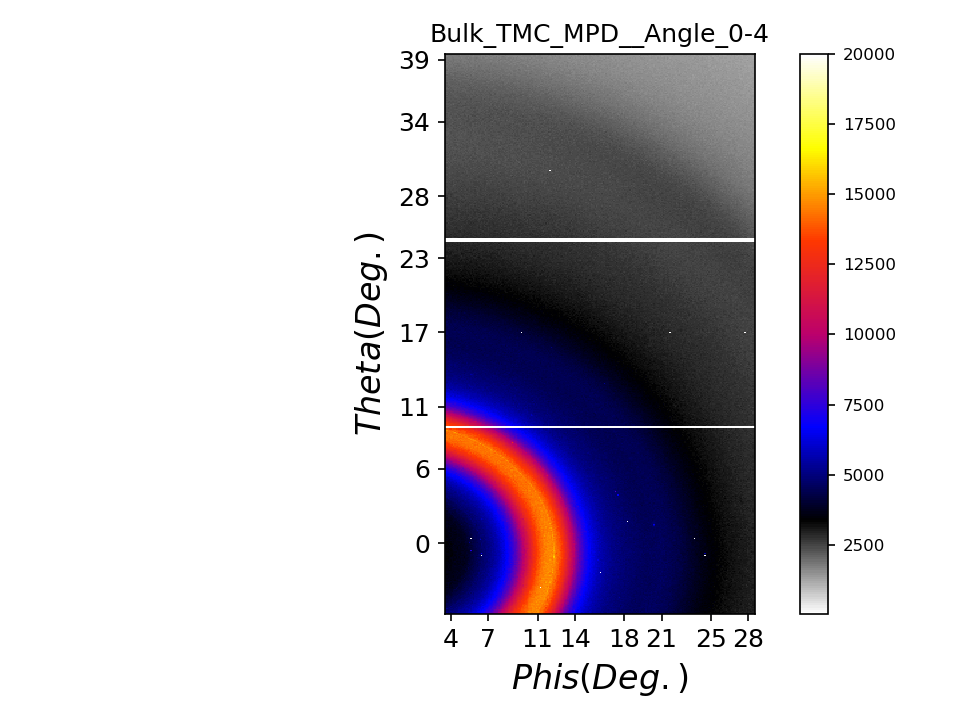

The data is save to: /GPFS/xf12id1/analysis/Debug/Results/Bulk_TMC_MPD__/Bulk_TMC_MPD__Angmap_0-4.tif.


In [32]:
vmin= 50
vmax= 2e4

fig,ax=plt.subplots()
show_img(data, logs = False,  ax=[fig,ax], 
         vmin=vmin, vmax=vmax,
         cmap = cmap_vge_hdr,  extent=[angxs, angxe, angzs, angze], aspect=1, 
          xlabel='$Phis (Deg.)$',  ylabel='$Theta (Deg.)$', 
         image_name = k+ 'Angle_%s-%s'%(Ns, Ns+Ni), dpi=500, save=False, path=ResDir)
ax.set_yticks( ytick )
ax.set_xticks( xtick )

fig.savefig( ResDir +  k+ 'Angle_%s-%s.png'%(Ns, Ns+Ni) )

save_array_to_tiff(  data, ResDir + k + 'Angmap_%s-%s.tif'%(Ns, Ns+Ni)  )
np.savetxt(  ResDir + k + 'Angmap_x_cor_%s-%s.txt'%(Ns, Ns+Ni),  axs )
np.savetxt(  ResDir + k + 'Angmap_z_cor_%s-%s.txt'%(Ns, Ns+Ni),  azs )

 
        
        

# Stitching data in q-space

In [51]:
vmin= 50
vmax= 6e4

-7.0 -25.0 [ 0.48337025  3.96262721 -0.80246487  5.18913296]


/home/yuzhang/pySMI/pySMI/Stitching.py:281: RuntimeWarning: divide by zero encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )
/home/yuzhang/pySMI/pySMI/Stitching.py:281: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


<IPython.core.display.Javascript object>


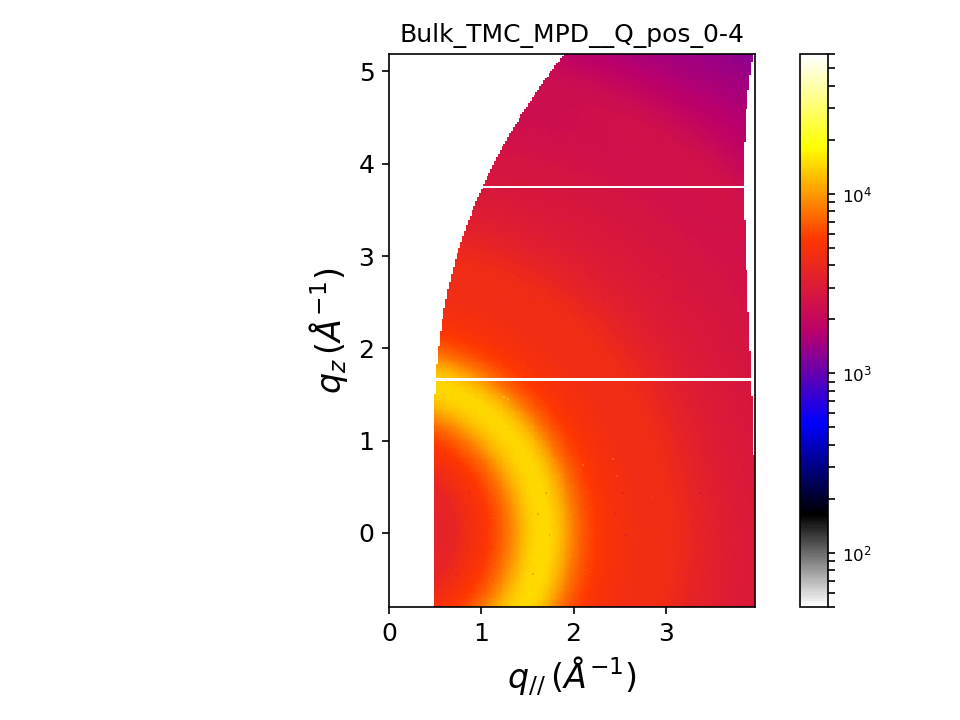

In [52]:
qdata, xs, zs = stitch_WAXS_in_Qspace( dataM, phis, calibration, x='Qr',
                              dx= 0, dy = 22, dz = 0,  dq= dq, mask=mask.data.T )    
show_img(qdata, logs = True,  vmin=  vmin, vmax= vmax,
         extent=[xs[0], xs[-1], zs[0],zs[-1]], xlabel='$q_{//} \, (\AA^{-1})$',  ylabel='$q_z \, (\AA^{-1})$', 
         cmap = cmap_vge_hdr,   aspect=1,  image_name = k + 'Q_pos_%s-%s'%(Ns, Ns+Ni), 
         save=True, path=ResDir)



-7.0 -25.0 [ 0.37348973  3.84401489 -0.80246487  5.18913296]


/home/yuzhang/pySMI/pySMI/Stitching.py:281: RuntimeWarning: divide by zero encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )
/home/yuzhang/pySMI/pySMI/Stitching.py:281: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


<IPython.core.display.Javascript object>


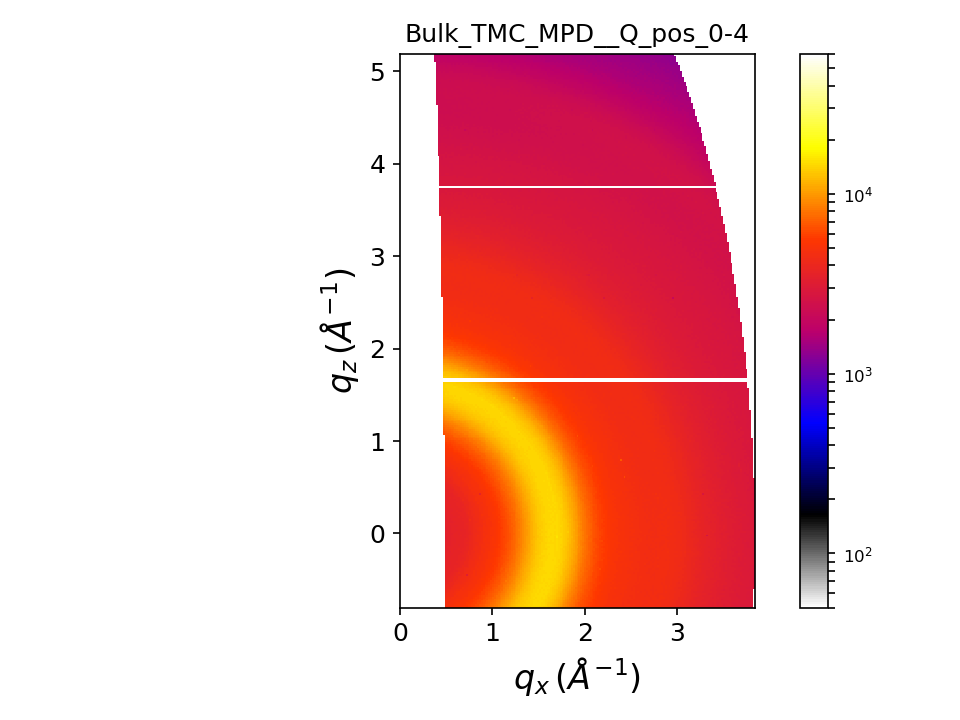

In [53]:
qdata, xs, zs = stitch_WAXS_in_Qspace( dataM, phis, calibration, x='Qx',
                              dx= 0, dy = 22, dz = 0,  dq= dq, mask=mask.data.T )    
show_img(qdata, logs = True,  vmin=  vmin, vmax= vmax,
         extent=[xs[0], xs[-1], zs[0],zs[-1]], xlabel='$q_{x} \, (\AA^{-1})$',  ylabel='$q_z \, (\AA^{-1})$', 
         cmap = cmap_vge_hdr,   aspect=1,  image_name = k + 'Q_pos_%s-%s'%(Ns, Ns+Ni), 
         save=True, path=ResDir)

-7.0 -25.0 [-1.95782029 -0.54989469 -0.80246487  5.18913296]


/home/yuzhang/pySMI/pySMI/Stitching.py:281: RuntimeWarning: divide by zero encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )
/home/yuzhang/pySMI/pySMI/Stitching.py:281: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


<IPython.core.display.Javascript object>


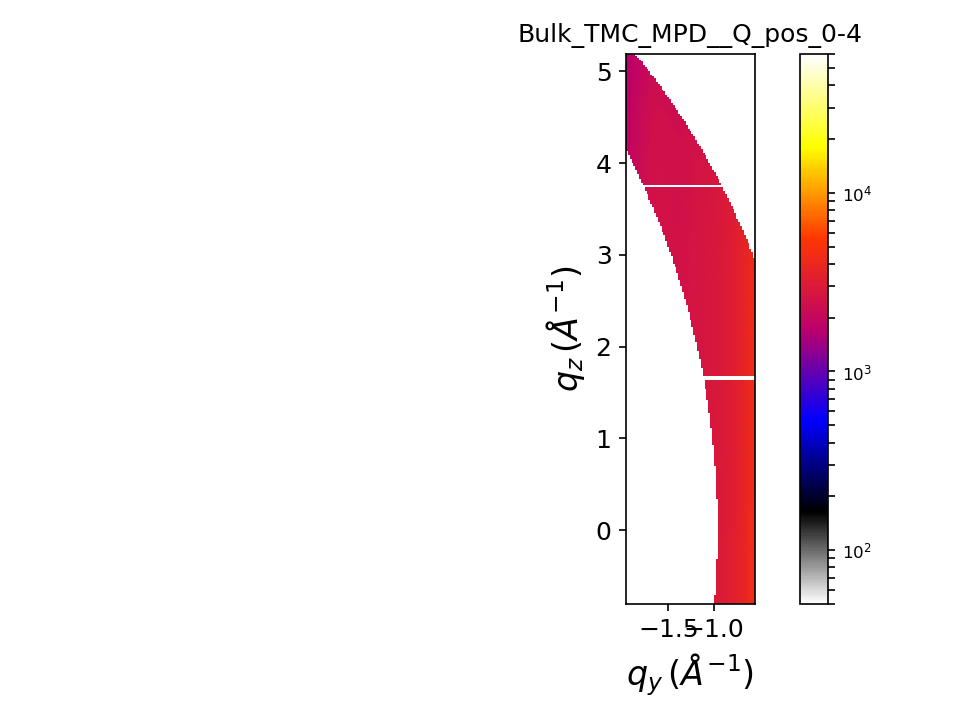

In [54]:
qdata, xs, zs = stitch_WAXS_in_Qspace( dataM, phis, calibration, x='Qy',
                              dx= 0, dy = 22, dz = 0,  dq= dq, mask=mask.data.T )    
show_img(qdata, logs = True,  vmin=  vmin, vmax= vmax,
         extent=[xs[0], xs[-1], zs[0],zs[-1]], xlabel='$q_{y} \, (\AA^{-1})$',  ylabel='$q_z \, (\AA^{-1})$', 
         cmap = cmap_vge_hdr,   aspect=1,  image_name = k + 'Q_pos_%s-%s'%(Ns, Ns+Ni), 
         save=True, path=ResDir)

# Show the stitched image with a ring

In [1151]:
if False:
    bx,by = np.argmin( np.abs(xs) ), np.argmin( np.abs(zs) )

    ring_mask = create_ring_mask( qdata.shape, 103, 184, [bx,by]  )

    show_img(qdata, label_array=ring_mask, logs = False, 
         vmin=  max(0,qdata.mean() -qdata.std()*sca), vmax= qdata.mean() + qdata.std()*sca,          
         cmap = cmap_vge_hdr,   aspect=1,  image_name = k + 'Q')


# Save data

xx, zz = np.meshgrid( axs, azs)            
m = np.round( np.vstack( [xx.ravel(), zz.ravel(), data.ravel()] ).T, 5) 
np.savetxt( ResDir  + k + 'Angle_data_%s_%s.txt'%(Ns, Ns+5),   m,fmt='%.5e', ) 
#np.save(  ResDir  + k + 'Angle_data', data )

xx, zz = np.meshgrid( xs, zs)            
m = np.round( np.vstack( [xx.ravel(), zz.ravel(), qdata.ravel()] ).T, 5) 
np.savetxt( ResDir  + k + 'Q_data_%s_%s.txt'%(Ns, Ns+5),   m,fmt='%.5e', ) 
#np.save(  ResDir  + k + 'Angle_data', data )

In [1165]:
save_array_to_tiff(  qdata, ResDir + k + 'Qmap_%s-%s.tif'%(Ns, Ns+Ni)  )
np.savetxt(  ResDir + k + 'Qmap_qx_cor_%s-%s.txt'%(Ns, Ns+Ni),  xs )
np.savetxt(  ResDir + k + 'Qmap_qz_cor_%s-%s.txt'%(Ns, Ns+Ni),  zs )

The data is save to: /GPFS/xf12id1/analysis/2018_2/303134_Ocko/Results/Ben/Priyanka_CNF_pure_inc_0.1_/Priyanka_CNF_pure_inc_0.1_Qmap_0-4.tif.


# OR Stitch by giving data

In [535]:
give_data= False

In [1153]:
if give_data:
    fps = [  'BSpec_RT_FullSample_ExoMeso_Coarse_Scan_%03d_WAXS.tif'%i for i in range(91, 96)]
    print(fps)

In [1154]:
if give_data:
    Data = np.zeros( 5, dtype= object )
    for j, fp in enumerate( fps ):
        Data[j] = np.array(  PIL.Image.open( inDir + fp    ).convert('I') )


In [1155]:
if give_data:
    data, dataM, scale,scale_smooth = Correct_Overlap_Images_Intensities( infiles, Data=Data,
                                                window_length=w, polyorder=p, 
                            overlap_width= overlap_width, badpixel_width = 10  )

    check_overlap_scaling_factor( scale,scale_smooth, i=1, 
                             filename = ResDir + k + 'smoothed_one_line_1_%s-%s.png'%(Ns, Ns+Ni), 
                             save= True )


## Debug Qmap

In [59]:
beam_x, beam_y

(98.0, 1316.0)

In [55]:
calibration = CalibrationGonio(wavelength_A= wavelength_A) # 20.0 keV
calibration.set_image_size(195, height=1475) # Pilatus300kW vertical
#calibration.set_image_size(1475, height=195) # Pilatus300kW horizontal
calibration.set_pixel_size(pixel_size_um=172.0)
calibration.set_beam_position(beam_x,  beam_y )
calibration.set_distance( sam_det )
calibration.set_angles(det_phi_g=0., det_theta_g=0., )
print('ratio Dw = {:.3f}'.format(calibration.get_ratioDw()))

ratio Dw = 8.199


In [95]:
calibration.set_angles(det_phi_g=0., det_theta_g=0., )

In [96]:
calibration.clear_maps()

In [97]:
qmap =  calibration.q_map()
amap =  calibration.angle_map()
xmap =  calibration.qx_map()
ymap =  calibration.qy_map()
zmap =  calibration.qz_map()
rmap =  calibration.qr_map()



In [98]:
amap

In [99]:
center = beam_x, beam_y

<IPython.core.display.Javascript object>


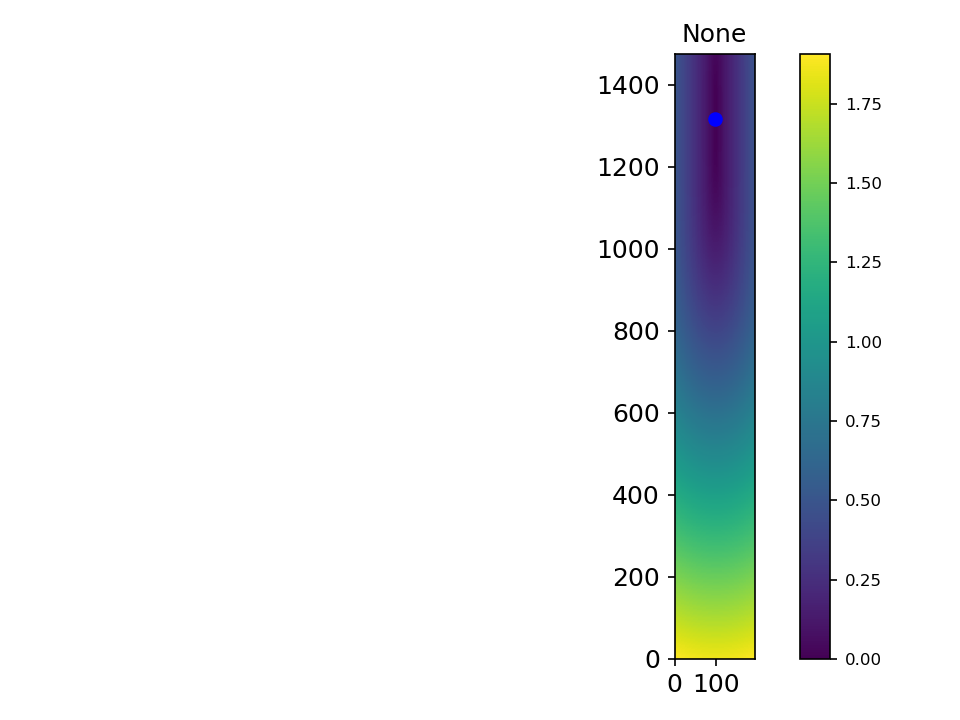

In [102]:
#show_img( qmap )
#show_img( amap )
show_img( rmap , aspect=1, center=center,  )

